In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
nas_full = pd.read_csv('../datasets/nas/nas_full.csv');

# trimming all whitespaces from cells
df_obj = nas_full.select_dtypes(['object'])
nas_full[df_obj.columns] = df_obj.apply(lambda x: x.str.strip())

nas_full.iloc[:,:]

df1 = nas_full.drop_duplicates(subset=['STUID'], keep=False)
df1 

STUID State  District  Gender  Age  Category  Same language  \
0       11011001001    AP         1       1    3         3              1   
1       11011001002    AP         1       2    3         4              2   
2       11011001003    AP         1       2    3         4              2   
3       11011001004    AP         1       2    3         3              2   
4       11011001005    AP         1       2    3         3              2   
5       11011001006    AP         1       2    3         3              1   
6       11011001007    AP         1       2    3         4              2   
7       11011001008    AP         1       2    2         0              2   
8       11011001009    AP         1       2    3         3              2   
9       11011001010    AP         1       2    2         4              2   
10      11011001012    AP         1       2    3         3              2   
11      11011001013    AP         1       2    5         3              2   
12      11011001014    AP         1       2    3         3              1   
13      11011001015    AP         1       2    3         3              1   
14      11011001016    AP         1       2    3         3              2   
15      11011001017    AP         1       2    2         4              2   
16      11011001018    AP         1       2    2         4              1   
17      11011001019    AP         1       2    0         0              0   
18      11011001020    AP         1       2    3         3              1   
19      11011001021    AP         1       2    3         4              1   
20      11011001022    AP         1       2    3         4              1   
21      11011001023    AP         1       2    3         4              1   
22      11011001024    AP         1       1    5         1              2   
23      11011001025    AP         1       1    3         1              1   
24      11011001026    AP         1       1    5         2              1   
25      11011001027    AP         1       1    5         2              1   
26      11011001029    AP         1       1    4         3              1   
27      11011001030    AP         1       2    5         3              2   
28      11011001031    AP         1       1    2         4              1   
29      11011001032    AP         1       1    0         3              2   
...             ...   ...       ...     ...  ...       ...            ...   
184640  45021031013    DD         2       2    3         3              1   
184641  45021031016    DD         2       2    4         2              1   
184642  45021031018    DD         2       2    3         2              1   
184643  45021031019    DD         2       2    3         3              1   
184644  45021031020    DD         2       2    3         3              1   
184645  45021031022    DD         2       2    4         3              1   
184646  45021031023    DD         2       2    4         4              1   
184647  45021031024    DD         2       2    4         4              1   
184648  45021031025    DD         2       2    5         4              2   
184649  45021031026    DD         2       2    2         4              1   
184650  45021031027    DD         2       2    2         4              1   
184651  45021031028    DD         2       2    5         3              0   
184652  45021031029    DD         2       1    5         3              1   
184653  45021031030    DD         2       1    3         3              1   
184654  45021031032    DD         2       1    3         1              1   
184655  45021031036    DD         2       1    4         2              1   
184656  45021031037    DD         2       2    3         3              1   
184657  45021031038    DD         2       2    3         4              2   
184658  45021031039    DD         2       2    5         4              1   
184659  45021031040    DD         2       2    4         4              2   
184660  45

In [10]:
#IGNORE
len(df1[(df1['Maths %'] > 80) & (df1.Distance == 0)])

38

In [12]:
#IGNORE
df_distance_maths = pd.DataFrame(columns = ['Top', 'Mid', 'Fail']);
j=0;
for i in df1.Distance.unique():
    #Count of students with maths marks > 80 & Distance = row_num
    df_distance_maths.loc[j] = [len(df1[(df1['Maths %'] > 80) & (df1.Distance == j)]), len(df1[(df1['Maths %'] < 81) & (df1['Maths %'] > 32) & (df1.Distance == j)]), len(df1[(df1['Maths %'] < 33) & (df1.Distance == j)])] 
    j+=1;
df_distance_maths

Top      Mid     Fail
0   38.0    920.0   1970.0
1  994.0  19828.0  35708.0
2  276.0   7169.0  12980.0
3   76.0   2415.0   5058.0
4   64.0   2256.0   4869.0

In [15]:
#IGNORE
df1.corr()
#df1.corr().to_csv('../datasets/OneLineCodeCorrelation.csv')

In [63]:
#Dividing Toppers
df_Top = df1.copy();
df_Top = df_Top.loc[df_Top['Maths %'] > 80];
corr = df_Top.corr()

#f, ax = plt.subplots(figsize=(63, 63))
#sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
#            square=True, ax=ax)

STUID  District    Gender       Age  Category  \
STUID                   1.000000 -0.097076  0.006432  0.012905 -0.020593   
District               -0.097076  1.000000  0.020739 -0.050762 -0.011575   
Gender                  0.006432  0.020739  1.000000 -0.059577  0.028075   
Age                     0.012905 -0.050762 -0.059577  1.000000 -0.024161   
Category               -0.020593 -0.011575  0.028075 -0.024161  1.000000   
Same language          -0.161813 -0.099858 -0.011248  0.050573  0.027508   
Siblings               -0.067325  0.109998  0.056514  0.092306 -0.122772   
Handicap               -0.002083  0.006692  0.009322 -0.005176  0.084074   
Father edu             -0.012793 -0.015211  0.035969 -0.071026  0.142410   
Mother edu             -0.026464 -0.057492  0.043294 -0.054027  0.133016   
Father occupation       0.025323 -0.058230  0.016978 -0.045646  0.120501   
Mother occupation      -0.036189 -0.005107 -0.000248  0.013200 -0.000604   
Below poverty          -0.027117  0.072529 -0.001722  0.034693 -0.070139   
Use calculator         -0.034762 -0.077012 -0.039498 -0.023940  0.088566   
Use computer           -0.037525 -0.034267 -0.017215 -0.039423  0.082466   
Use Internet           -0.035750 -0.031712 -0.062729 -0.016606  0.067618   
Use dictionary         -0.049006 -0.072503  0.017647 -0.029904  0.114589   
Read other books        0.000135 -0.032955  0.011744 -0.009087  0.051041   
# Books                -0.065489 -0.018920  0.014412 -0.025027  0.061867   
Distance               -0.004207 -0.042488 -0.022972 -0.011493  0.029234   
Computer use            0.141470 -0.183690 -0.000475 -0.005768  0.018669   
Library use             0.023731  0.034040  0.007913 -0.017888  0.013056   
Like school             0.016864 -0.011633  0.006149  0.024579  0.032384   
Subjects                0.003810 -0.101690 -0.009125 -0.017323  0.039255   
Give Lang HW            0.026001  0.060571  0.033059  0.004304 -0.014588   
Give Math HW            0.015410  0.002239  0.026537 -0.005930  0.027289   
Give Scie HW            0.008576  0.033852  0.023944 -0.000424  0.004196   
Give SoSc HW            0.005976  0.048619  0.018939  0.004871  0.000065   
Correct Lang HW         0.004681  0.059844  0.011304  0.008008 -0.023611   
Correct Math HW        -0.004926  0.019373  0.008788 -0.004166  0.005885   
...                          ...       ...       ...       ...       ...   
Private tuition         0.002100 -0.020439 -0.022642 -0.063158  0.092959   
English is difficult    0.041481 -0.065136 -0.034430  0.034847 -0.040939   
Read English           -0.004922 -0.022985 -0.014582  0.003063  0.028819   
Dictionary to learn     0.002107 -0.048655  0.011282  0.012468  0.018803   
Answer English WB      -0.055133  0.033388  0.018349 -0.012064  0.032707   
Answer English aloud    0.011506 -0.003841  0.010252  0.006490  0.016047   
Maths is difficult      0.032018  0.001050  0.030266  0.048327 -0.038135   
Solve Maths            -0.003330 -0.039296 -0.025723 -0.016345  0.051019   
Solve Maths in groups  -0.046581  0.026257  0.011601  0.013478  0.018284   
Draw geometry          -0.037223 -0.006001 -0.003251 -0.021153  0.050830   
Explain answers        -0.042107 -0.021859  0.006011 -0.011004  0.066536   
SocSci is difficult     0.010603 -0.032799 -0.012552  0.019299 -0.003360   
Historical excursions   0.023510  0.023444  0.004188 -0.004434  0.023559   
Participate in SocSci   0.009460 -0.000100  0.019015  0.001792  0.045075   
Small groups in SocSci -0.041380  0.016277  0.034644  0.002361  0.041217   
Express SocSci views   -0.032907  0.014617  0.013349  0.001234  0.044186   
Science is difficult    0.016420  0.009579  0.002646  0.031208 -0.036182   
Observe experiments     0.000226 -0.073912  0.016085  0.000873  0.054398   
Conduct experiments    -0.062694 -0.054811  0.004217  0.011370  0.014219   
Solve science problems -0.041708 -0.009132  0.021037 -0.007024  0.039571   
Express science views  -0.032225 -0.022829 -0.000729  0.004896  0.059472   

In [20]:
df_Top.corr().to_csv('../datasets/nas/MathsToppersCorrelation.csv')

In [48]:
#Dividing Mid
df_Mid = df1.copy();
df_Mid = df_Mid.loc[((df_Mid['Maths %'] >= 33) & (df_Mid['Maths %'] < 81))];
corr_mid = df_Mid.corr()
corr_mid
#df_Top.corr().to_csv('../datasets/nas/MathsMidCorrelation.csv')
#f, ax = plt.subplots(figsize=(63, 63))
#sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
#            square=True, ax=ax)

STUID  District    Gender       Age  Category  \
STUID                   1.000000 -0.097076  0.006432  0.012905 -0.020593   
District               -0.097076  1.000000  0.020739 -0.050762 -0.011575   
Gender                  0.006432  0.020739  1.000000 -0.059577  0.028075   
Age                     0.012905 -0.050762 -0.059577  1.000000 -0.024161   
Category               -0.020593 -0.011575  0.028075 -0.024161  1.000000   
Same language          -0.161813 -0.099858 -0.011248  0.050573  0.027508   
Siblings               -0.067325  0.109998  0.056514  0.092306 -0.122772   
Handicap               -0.002083  0.006692  0.009322 -0.005176  0.084074   
Father edu             -0.012793 -0.015211  0.035969 -0.071026  0.142410   
Mother edu             -0.026464 -0.057492  0.043294 -0.054027  0.133016   
Father occupation       0.025323 -0.058230  0.016978 -0.045646  0.120501   
Mother occupation      -0.036189 -0.005107 -0.000248  0.013200 -0.000604   
Below poverty          -0.027117  0.072529 -0.001722  0.034693 -0.070139   
Use calculator         -0.034762 -0.077012 -0.039498 -0.023940  0.088566   
Use computer           -0.037525 -0.034267 -0.017215 -0.039423  0.082466   
Use Internet           -0.035750 -0.031712 -0.062729 -0.016606  0.067618   
Use dictionary         -0.049006 -0.072503  0.017647 -0.029904  0.114589   
Read other books        0.000135 -0.032955  0.011744 -0.009087  0.051041   
# Books                -0.065489 -0.018920  0.014412 -0.025027  0.061867   
Distance               -0.004207 -0.042488 -0.022972 -0.011493  0.029234   
Computer use            0.141470 -0.183690 -0.000475 -0.005768  0.018669   
Library use             0.023731  0.034040  0.007913 -0.017888  0.013056   
Like school             0.016864 -0.011633  0.006149  0.024579  0.032384   
Subjects                0.003810 -0.101690 -0.009125 -0.017323  0.039255   
Give Lang HW            0.026001  0.060571  0.033059  0.004304 -0.014588   
Give Math HW            0.015410  0.002239  0.026537 -0.005930  0.027289   
Give Scie HW            0.008576  0.033852  0.023944 -0.000424  0.004196   
Give SoSc HW            0.005976  0.048619  0.018939  0.004871  0.000065   
Correct Lang HW         0.004681  0.059844  0.011304  0.008008 -0.023611   
Correct Math HW        -0.004926  0.019373  0.008788 -0.004166  0.005885   
...                          ...       ...       ...       ...       ...   
Private tuition         0.002100 -0.020439 -0.022642 -0.063158  0.092959   
English is difficult    0.041481 -0.065136 -0.034430  0.034847 -0.040939   
Read English           -0.004922 -0.022985 -0.014582  0.003063  0.028819   
Dictionary to learn     0.002107 -0.048655  0.011282  0.012468  0.018803   
Answer English WB      -0.055133  0.033388  0.018349 -0.012064  0.032707   
Answer English aloud    0.011506 -0.003841  0.010252  0.006490  0.016047   
Maths is difficult      0.032018  0.001050  0.030266  0.048327 -0.038135   
Solve Maths            -0.003330 -0.039296 -0.025723 -0.016345  0.051019   
Solve Maths in groups  -0.046581  0.026257  0.011601  0.013478  0.018284   
Draw geometry          -0.037223 -0.006001 -0.003251 -0.021153  0.050830   
Explain answers        -0.042107 -0.021859  0.006011 -0.011004  0.066536   
SocSci is difficult     0.010603 -0.032799 -0.012552  0.019299 -0.003360   
Historical excursions   0.023510  0.023444  0.004188 -0.004434  0.023559   
Participate in SocSci   0.009460 -0.000100  0.019015  0.001792  0.045075   
Small groups in SocSci -0.041380  0.016277  0.034644  0.002361  0.041217   
Express SocSci views   -0.032907  0.014617  0.013349  0.001234  0.044186   
Science is difficult    0.016420  0.009579  0.002646  0.031208 -0.036182   
Observe experiments     0.000226 -0.073912  0.016085  0.000873  0.054398   
Conduct experiments    -0.062694 -0.054811  0.004217  0.011370  0.014219   
Solve science problems -0.041708 -0.009132  0.021037 -0.007024  0.039571   
Express science views  -0.032225 -0.022829 -0.000729  0.004896  0.059472   

In [49]:
df1.shape[1]

64

In [56]:
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = corr_mid.columns
    for i in range(0, corr_mid.shape[1]-4):
        pairs_to_drop.add((cols[i]))
    return pairs_to_drop

labels_to_drop = get_redundant_pairs(corr_mid)
corr_mid = corr_mid.drop(labels=labels_to_drop)
corr_mid

STUID  District    Gender       Age  Category  Same language  \
Maths %    0.045424  0.084953  0.015604 -0.013179 -0.010356      -0.009829   
Reading %  0.003566  0.007723  0.024130 -0.030957  0.110561      -0.050623   
Science %  0.082015 -0.082595  0.000734 -0.039257  0.054362       0.039891   
Social %  -0.057822  0.131000  0.011514 -0.051755  0.016761       0.042865   

           Siblings  Handicap  Father edu  Mother edu    ...     \
Maths %    0.109021  0.015825   -0.010042   -0.051130    ...      
Reading % -0.198360  0.069395    0.209472    0.223142    ...      
Science % -0.073067  0.057204    0.085097    0.092763    ...      
Social %   0.022070  0.028717    0.043646    0.030982    ...      

           Express science views  Watch TV  Read magazine  Read a book  \
Maths %                 0.032169 -0.042521       0.009488    -0.017086   
Reading %               0.106237  0.084672       0.141861     0.094453   
Science %               0.113027  0.043633       0.072979     0.047387   
Social %                0.080178  0.001625       0.060950     0.055838   

           Play games  Help in household   Maths %  Reading %  Science %  \
Maths %      0.039390           0.056491  1.000000   0.099733   0.307315   
Reading %    0.024974           0.018376  0.099733   1.000000   0.329467   
Science %    0.079582           0.056729  0.307315   0.329467   1.000000   
Social %     0.054105           0.110393  0.355514   0.307189   0.458004   

           Social %  
Maths %    0.355514  
Reading %  0.307189  
Science %  0.458004  
Social %   1.000000  

[4 rows x 63 columns]

In [64]:
corr_mid.to_csv('../datasets/nas/MathsMidCorrelation.csv')

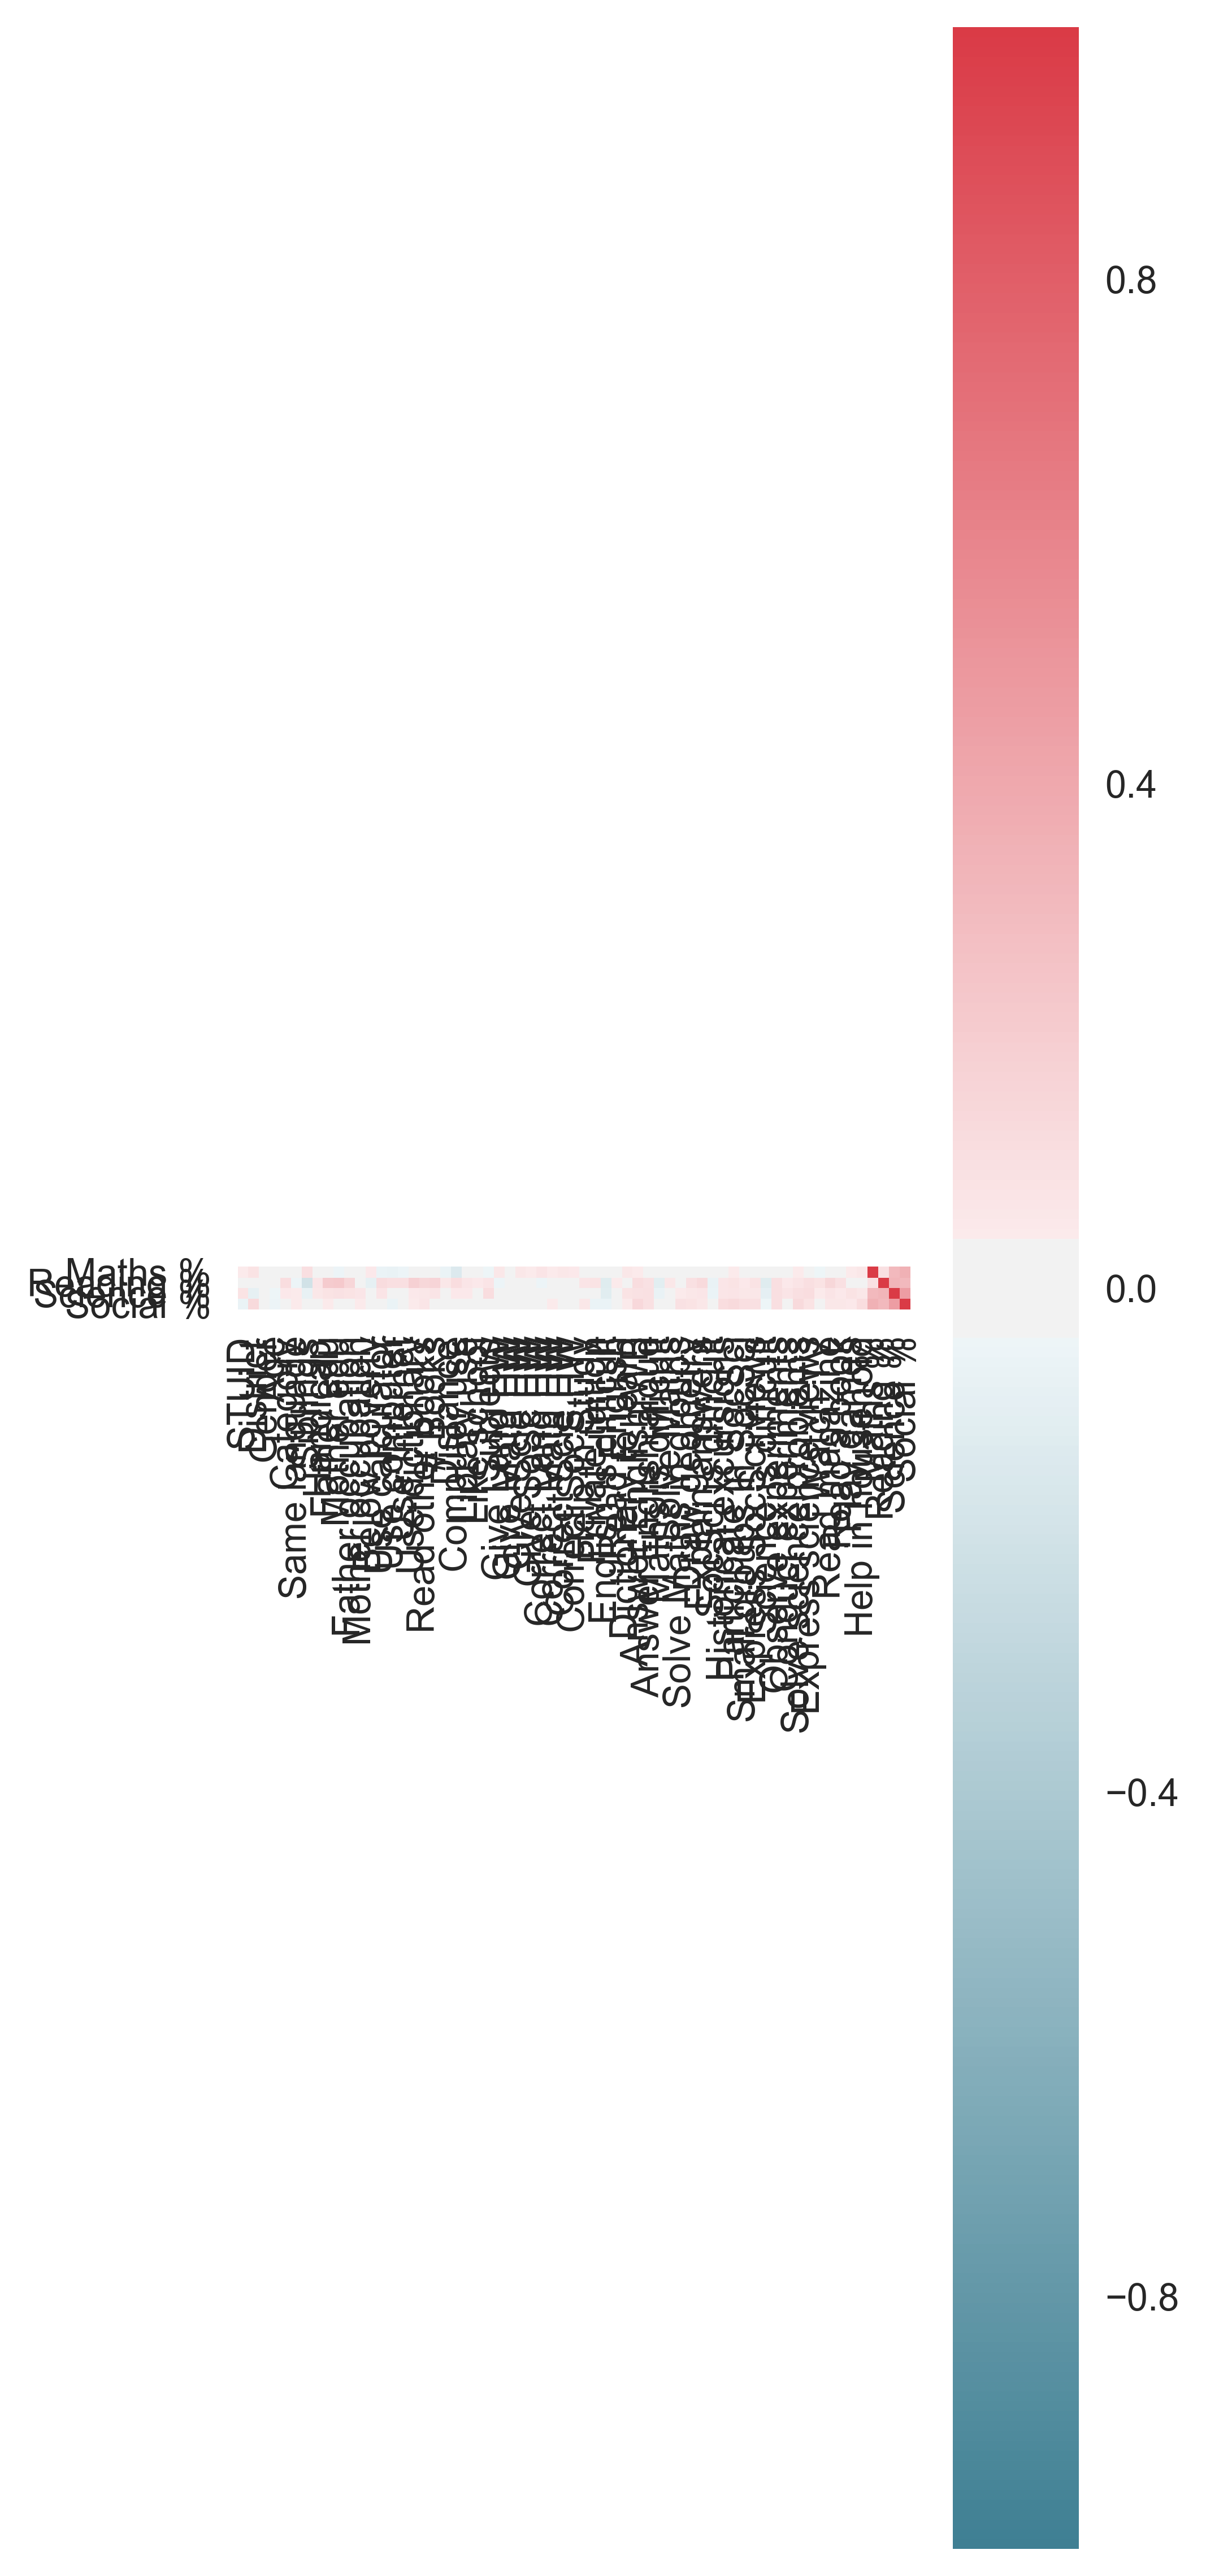

In [62]:
f, ax = plt.subplots(figsize=(4, 63),dpi=480)
sns.heatmap(corr_mid, mask=np.zeros_like(corr_mid, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
           square=True, ax=ax)

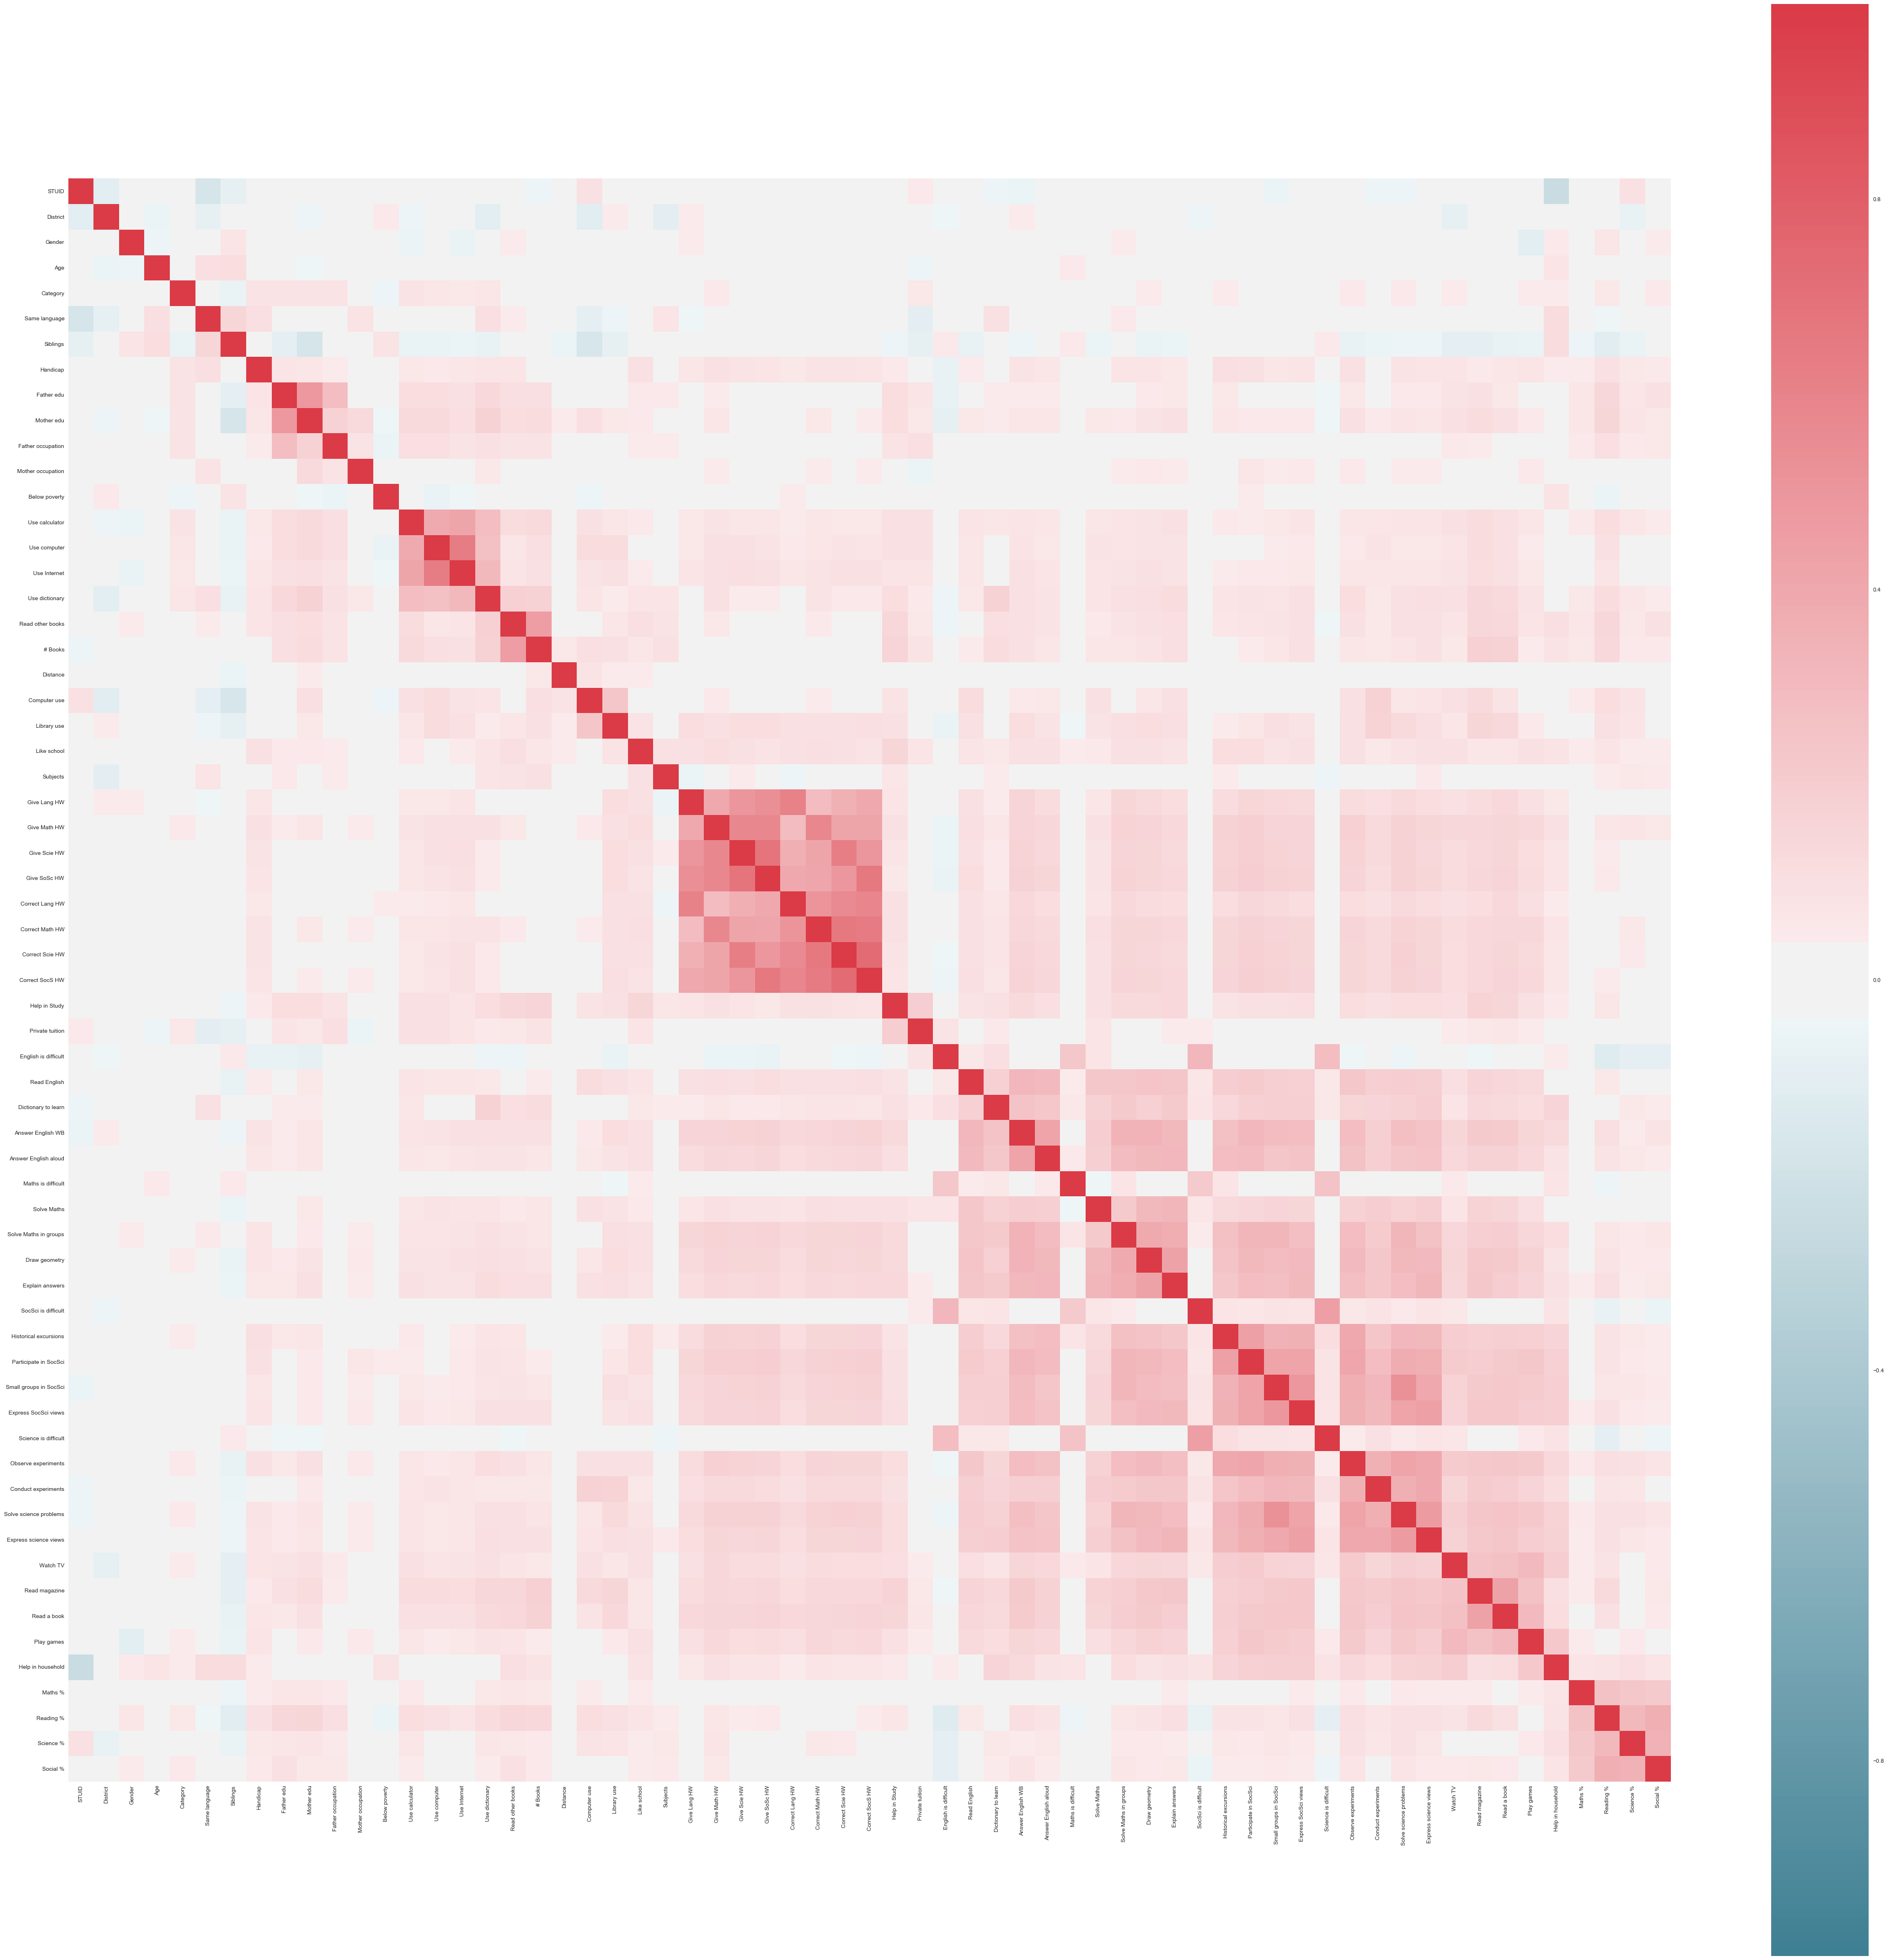

In [45]:
#Dividing Failed
df_Failed = df1.copy();
df_Failed = df_Failed.loc[df_Failed['Maths %'] < 33];
corr = df_Failed.corr();
corr
#df_Failed.corr().to_csv('../datasets/nas/MathsFailedCorrelation.csv')
# plot the heatmap
f, ax = plt.subplots(figsize=(63, 63))
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

In [ ]:
#Dividing Top Science
df_TopS = df1.copy();
df_TopS = df_TopS.loc[df_TopS['Maths %'] > 80];
corr_topS = df_TopS.corr()
labels_to_drop = get_redundant_pairs(corr_topS)
corr_topS = corr_topS.drop(labels=labels_to_drop)
corr_topS.to_csv('../datasets/nas/SciencesTopCorrelation.csv')

#Dividing Mid
df_MidS = df1.copy();
df_MidS = df_MidS.loc[((df_MidS['Science %'] >= 33) & (df_MidS['Science %'] < 81))];
corr_midS = df_MidS.corr()
labels_to_drop = get_redundant_pairs(corr_midS)
corr_midS = corr_midS.drop(labels=labels_to_drop)
corr_midS.to_csv('../datasets/nas/SciencesMidCorrelation.csv')

#Dividing Failed
df_FailedS = df1.copy();
df_FailedS = df_FailedS.loc[df_FailedS['Maths %'] < 33];
corr_FailedS = df_FailedS.corr()
labels_to_drop = get_redundant_pairs(corr_FailedS)
corr_FailedS = corr_FailedS.drop(labels=labels_to_drop)
corr_FailedS.to_csv('../datasets/nas/SciencesFailedCorrelation.csv')

In [ ]:
#Dividing Top Social Science
df_TopO = df1.copy();
df_TopO = df_TopO.loc[df_TopO['Maths %'] > 80];
corr_TopO = df_TopO.corr()
labels_to_drop = get_redundant_pairs(corr_TopO)
corr_TopO = corr_TopO.drop(labels=labels_to_drop)
corr_TopO.to_csv('../datasets/nas/SocialTopCorrelation.csv')

#Dividing Mid
df_MidO = df1.copy();
df_MidO = df_MidO.loc[((df_MidO['Science %'] >= 33) & (df_MidO['Science %'] < 81))];
corr_MidO = df_MidO.corr()
labels_to_drop = get_redundant_pairs(corr_MidO)
corr_MidO = corr_MidO.drop(labels=labels_to_drop)
corr_MidO.to_csv('../datasets/nas/SocialMidCorrelation.csv')

#Dividing Failed
df_FailedO = df1.copy();
df_FailedO = df_FailedO.loc[df_FailedO['Maths %'] < 33];
corr_FailedO = df_FailedO.corr()
labels_to_drop = get_redundant_pairs(corr_FailedO)
corr_FailedO = corr_FailedO.drop(labels=labels_to_drop)
corr_FailedO.to_csv('../datasets/nas/SocialFailedCorrelation.csv')

In [ ]:
#Dividing Top Reading
df_TopR = df1.copy();
df_TopR = df_TopR.loc[df_TopR['Maths %'] > 80];
corr_TopR = df_TopR.corr()
labels_to_drop = get_redundant_pairs(corr_TopR)
corr_TopR = corr_TopR.drop(labels=labels_to_drop)
corr_TopR.to_csv('../datasets/nas/ReadingTopCorrelation.csv')

#Dividing Mid
df_MidR = df1.copy();
df_MidR = df_MidR.loc[((df_MidR['Science %'] >= 33) & (df_MidR['Science %'] < 81))];
corr_MidR = df_MidR.corr()
labels_to_drop = get_redundant_pairs(corr_MidR)
corr_MidR = corr_MidR.drop(labels=labels_to_drop)
corr_MidR.to_csv('../datasets/nas/ReadingMidCorrelation.csv')

#Dividing Failed
df_FailedR = df1.copy();
df_FailedR = df_FailedR.loc[df_FailedR['Maths %'] < 33];
corr_FailedR = df_FailedR.corr()
labels_to_drop = get_redundant_pairs(corr_FailedR)
corr_FailedR = corr_FailedR.drop(labels=labels_to_drop)
corr_FailedR.to_csv('../datasets/nas/ReadingFailedCorrelation.csv')

In [125]:
marksdf=df1[['STUID','Maths %','Science %','Reading %','Social %']];
marksdf

STUID  Maths %  Science %  Reading %  Social %
2       11011001003    27.78        NaN      70.00       NaN
3       11011001004      NaN        NaN      56.67     36.00
4       11011001005      NaN      14.55        NaN      8.33
5       11011001006      NaN        NaN      23.33     30.00
6       11011001007    40.74        NaN      70.00       NaN
7       11011001008      NaN        NaN      26.67     22.92
8       11011001009    24.07      25.45        NaN       NaN
9       11011001010    18.52        NaN      26.67       NaN
10      11011001012    37.04        NaN      16.67       NaN
11      11011001013    20.37      20.00        NaN       NaN
12      11011001014      NaN      29.63        NaN     35.42
13      11011001015    27.78        NaN      66.67       NaN
14      11011001016    18.52        NaN        NaN       NaN
15      11011001017      NaN      42.59        NaN     32.00
16      11011001018    16.67        NaN        NaN       NaN
17      11011001019      NaN      21.82        NaN       NaN
18      11011001020      NaN        NaN      20.00     16.00
19      11011001021      NaN      18.52        NaN     16.67
20      11011001022    29.63      18.18        NaN       NaN
21      11011001023      NaN        NaN      43.33       NaN
22      11011001024    38.89        NaN      60.00       NaN
23      11011001025    27.78      33.33        NaN       NaN
24      11011001026      NaN        NaN      43.33     42.00
25      11011001027      NaN      43.64        NaN     39.58
26      11011001029    29.63        NaN      73.33       NaN
27      11011001030    29.63        NaN        NaN       NaN
28      11011001031    24.07      40.74        NaN       NaN
29      11011001032      NaN        NaN      13.33     14.58
30      11011001033      NaN        NaN      30.00       NaN
31      11011001035    22.22       0.00        NaN       NaN
...             ...      ...        ...        ...       ...
184640  45021031013      NaN        NaN        NaN       NaN
184641  45021031016    30.51      32.73      44.83     17.02
184642  45021031018    27.12      32.73      27.59     29.79
184643  45021031019      NaN      50.00        NaN     30.61
184644  45021031020    33.90      52.73      93.10     23.40
184645  45021031022    23.73      36.36      48.28     36.17
184646  45021031023    36.67      37.50      66.67     34.69
184647  45021031024    25.42      49.09      82.76     29.79
184648  45021031025    26.67      32.14      63.33     26.53
184649  45021031026    27.12      38.18      34.48     29.79
184650  45021031027    30.00      33.93      53.33     24.49
184651  45021031028    28.81      34.55      79.31     25.53
184652  45021031029    20.00      35.71      36.67     24.49
184653  45021031030    38.98      45.45      79.31     34.04
184654  45021031032    28.81      60.00      82.76     42.55
184655  45021031036      NaN      29.09        NaN     21.28
184656  45021031037    40.00      35.71      63.33     42.86
184657  45021031038    25.42      40.00      51.72     23.40
184658  45021031039    23.33      33.93      46.67     30.61
184659  45021031040    27.12      32.73      24.14     44.68
184660  45021031041    33.90      41.07      66.67     38.78
184661  45021031042      NaN      36.36      72.41     42.55
184662  45021031045    36.67      41.07      66.67     42.86
184663  45021031046    42.37      45.45      72.41     36.17
184664  45021031047    45.00      32.14      66.67     24.49
184665  45021031048    22.03      38.18      65.52     19.15
184666  45021031049    31.67      41.07      40.00     24.49
184667  45021031050    40.68      38.18      41.38     27.66
184668  45021031051    18.33      33.93      70.00     32.65
184669  45021031052    23.73      41.82      55.17     31.91

[184668 rows x 5 columns]

In [126]:
marksdf['Maths %'] = marksdf['Maths %'].round()
marksdf['Science %'] = marksdf['Science %'].round()
marksdf['Reading %'] = marksdf['Reading %'].round()
marksdf['Social %'] = marksdf['Social %'].round()
marksdf


D:\Application\Anaconda\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
D:\Application\Anaconda\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
D:\Application\Anaconda\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: 

STUID  Maths %  Science %  Reading %  Social %
2       11011001003     28.0        NaN       70.0       NaN
3       11011001004      NaN        NaN       57.0      36.0
4       11011001005      NaN       15.0        NaN       8.0
5       11011001006      NaN        NaN       23.0      30.0
6       11011001007     41.0        NaN       70.0       NaN
7       11011001008      NaN        NaN       27.0      23.0
8       11011001009     24.0       25.0        NaN       NaN
9       11011001010     19.0        NaN       27.0       NaN
10      11011001012     37.0        NaN       17.0       NaN
11      11011001013     20.0       20.0        NaN       NaN
12      11011001014      NaN       30.0        NaN      35.0
13      11011001015     28.0        NaN       67.0       NaN
14      11011001016     19.0        NaN        NaN       NaN
15      11011001017      NaN       43.0        NaN      32.0
16      11011001018     17.0        NaN        NaN       NaN
17      11011001019      NaN       22.0        NaN       NaN
18      11011001020      NaN        NaN       20.0      16.0
19      11011001021      NaN       19.0        NaN      17.0
20      11011001022     30.0       18.0        NaN       NaN
21      11011001023      NaN        NaN       43.0       NaN
22      11011001024     39.0        NaN       60.0       NaN
23      11011001025     28.0       33.0        NaN       NaN
24      11011001026      NaN        NaN       43.0      42.0
25      11011001027      NaN       44.0        NaN      40.0
26      11011001029     30.0        NaN       73.0       NaN
27      11011001030     30.0        NaN        NaN       NaN
28      11011001031     24.0       41.0        NaN       NaN
29      11011001032      NaN        NaN       13.0      15.0
30      11011001033      NaN        NaN       30.0       NaN
31      11011001035     22.0        0.0        NaN       NaN
...             ...      ...        ...        ...       ...
184640  45021031013      NaN        NaN        NaN       NaN
184641  45021031016     31.0       33.0       45.0      17.0
184642  45021031018     27.0       33.0       28.0      30.0
184643  45021031019      NaN       50.0        NaN      31.0
184644  45021031020     34.0       53.0       93.0      23.0
184645  45021031022     24.0       36.0       48.0      36.0
184646  45021031023     37.0       38.0       67.0      35.0
184647  45021031024     25.0       49.0       83.0      30.0
184648  45021031025     27.0       32.0       63.0      27.0
184649  45021031026     27.0       38.0       34.0      30.0
184650  45021031027     30.0       34.0       53.0      24.0
184651  45021031028     29.0       35.0       79.0      26.0
184652  45021031029     20.0       36.0       37.0      24.0
184653  45021031030     39.0       45.0       79.0      34.0
184654  45021031032     29.0       60.0       83.0      43.0
184655  45021031036      NaN       29.0        NaN      21.0
184656  45021031037     40.0       36.0       63.0      43.0
184657  45021031038     25.0       40.0       52.0      23.0
184658  45021031039     23.0       34.0       47.0      31.0
184659  45021031040     27.0       33.0       24.0      45.0
184660  45021031041     34.0       41.0       67.0      39.0
184661  45021031042      NaN       36.0       72.0      43.0
184662  45021031045     37.0       41.0       67.0      43.0
184663  45021031046     42.0       45.0       72.0      36.0
184664  45021031047     45.0       32.0       67.0      24.0
184665  45021031048     22.0       38.0       66.0      19.0
184666  45021031049     32.0       41.0       40.0      24.0
184667  45021031050     41.0       38.0       41.0      28.0
184668  45021031051     18.0       34.0       70.0      33.0
184669  45021031052     24.0       42.0       55.0      32.0

[184668 rows x 5 columns]

In [127]:
marksdf1 = pd.DataFrame(columns = ['Marks', 'MathsStudent#', 'ScienceStudent#','SocialStudent#','ReadingStudent#']);
marksdf1['Marks']= range(101);
marksdf1

Marks MathsStudent# ScienceStudent# SocialStudent# ReadingStudent#
0        0           NaN             NaN            NaN             NaN
1        1           NaN             NaN            NaN             NaN
2        2           NaN             NaN            NaN             NaN
3        3           NaN             NaN            NaN             NaN
4        4           NaN             NaN            NaN             NaN
5        5           NaN             NaN            NaN             NaN
6        6           NaN             NaN            NaN             NaN
7        7           NaN             NaN            NaN             NaN
8        8           NaN             NaN            NaN             NaN
9        9           NaN             NaN            NaN             NaN
10      10           NaN             NaN            NaN             NaN
11      11           NaN             NaN            NaN             NaN
12      12           NaN             NaN            NaN             NaN
13      13           NaN             NaN            NaN             NaN
14      14           NaN             NaN            NaN             NaN
15      15           NaN             NaN            NaN             NaN
16      16           NaN             NaN            NaN             NaN
17      17           NaN             NaN            NaN             NaN
18      18           NaN             NaN            NaN             NaN
19      19           NaN             NaN            NaN             NaN
20      20           NaN             NaN            NaN             NaN
21      21           NaN             NaN            NaN             NaN
22      22           NaN             NaN            NaN             NaN
23      23           NaN             NaN            NaN             NaN
24      24           NaN             NaN            NaN             NaN
25      25           NaN             NaN            NaN             NaN
26      26           NaN             NaN            NaN             NaN
27      27           NaN             NaN            NaN             NaN
28      28           NaN             NaN            NaN             NaN
29      29           NaN             NaN            NaN             NaN
..     ...           ...             ...            ...             ...
71      71           NaN             NaN            NaN             NaN
72      72           NaN             NaN            NaN             NaN
73      73           NaN             NaN            NaN             NaN
74      74           NaN             NaN            NaN             NaN
75      75           NaN             NaN            NaN             NaN
76      76           NaN             NaN            NaN             NaN
77      77           NaN             NaN            NaN             NaN
78      78           NaN             NaN            NaN             NaN
79      79           NaN             NaN            NaN             NaN
80      80           NaN             NaN            NaN             NaN
81      81           NaN             NaN            NaN             NaN
82      82           NaN             NaN            NaN             NaN
83      83           NaN             NaN            NaN             NaN
84      84           NaN             NaN            NaN             NaN
85      85           NaN             NaN            NaN             NaN
86      86           NaN             NaN            NaN             NaN
87      87           NaN             NaN            NaN             NaN
88      88           NaN             NaN            NaN             NaN
89      89           NaN             NaN            NaN             NaN
90      90           NaN             NaN            NaN             NaN
91      91           NaN             NaN            NaN             NaN
92      92           NaN             NaN            NaN             NaN
93      93           NaN             NaN            NaN             NaN
94      94           NaN             NaN     

In [132]:
for j in range(101):
    print(j);
    marksdf1.at[j, 'MathsStudent#'] = len(marksdf[(marksdf['Maths %'] == j) & marksdf['Maths %'].notnull()]);
    marksdf1.at[j, 'ScienceStudent#']= len(marksdf[(marksdf['Science %'] == j) & marksdf['Science %'].notnull()]);
    marksdf1.at[j, 'SocialStudent#']= len(marksdf[(marksdf['Social %'] == j) & marksdf['Social %'].notnull()]);
    marksdf1.at[j, 'ReadingStudent#']= len(marksdf[(marksdf['Reading %'] == j) & marksdf['Reading %'].notnull()]);
marksdf1
    
     

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100


Marks MathsStudent# ScienceStudent# SocialStudent# ReadingStudent#
0        0            87             103             79             456
1        1             0               0              0               0
2        2           110             126            103               0
3        3           116               0              0             476
4        4            39             173            149               5
5        5           205             219              0               0
6        6             9               7            219               0
7        7           298             288              2             808
8        8           338               0            287               7
9        9           113             386              7               0
10      10           524               0            384            1334
11      11           155             536              7               0
12      12           989             303            533              10
13      13           634             422             20            1979
14      14          1034             431            797             103
15      15          2103             618             95               0
16      16           507            1460           1124               0
17      17          2953              73            177            3228
18      18          2051            2036           1719               0
19      19          2708             107            208               0
20      20          4995            2777           2446            4063
21      21          1032            1501            311             235
22      22          5806            2043           3017               0
23      23          2799            1862            432            4804
24      24          3780            2519           3933             249
25      25          5848            4598            345              32
26      26          1126             270           4002               0
27      27          5076            5119            846            5342
28      28          2895             296           4406             248
29      29          3259            5132            959              29
..     ...           ...             ...            ...             ...
71      71           272             491            159               2
72      72           243              17            549             261
73      73           383             431            115            3115
74      74            30              14            444               0
75      75           370             387             40               1
76      76           220             218            391             222
77      77           165             111             58            2716
78      78           289             164            354               0
79      79            18             115             43             196
80      80           280             249            226            2394
81      81           137               8             38               0
82      82           136             182            198               0
83      83           207              12             24            2099
84      84            27             123            144               0
85      85           165              77             10               0
86      86           101              48            106             143
87      87            78              55              1            1450
88      88           139              26             76               0
89      89            14              56              0               0
90      90           121               0             52             993
91      91            13              31              0               0
92      92            87               0             22               0
93      93            90              15              0             558
94      94             0               0     

In [142]:
topMathsAndPass =len(df1[(df1['Maths %'] > 80) & (df1['Science %'].isnull() | (df1['Science %']>=33)) & (df1['Reading %'].isnull() | (df1['Reading %']>=33)) & (df1['Social %'].isnull() | (df1['Social %']>=33))]);
topMathsAndPass

1300

In [147]:
MathsRemovedNA = len(df1)-len(df1[(df1['Maths %'].isnull())]);
MathsRemovedNA

92255

In [150]:
ScienceRemovedNA = len(df1)-len(df1[(df1['Science %'].isnull())]);
print("ScienceRemovedNA",ScienceRemovedNA)

SocialRemovedNA = len(df1)-len(df1[(df1['Social %'].isnull())]);
print("SocialRemovedNA",SocialRemovedNA)

ReadingRemovedNA = len(df1)-len(df1[(df1['Reading %'].isnull())]);
print("ReadingRemovedNA",ReadingRemovedNA)




ScienceRemovedNA 90918
SocialRemovedNA 89485
ReadingRemovedNA 93079


In [143]:
topScienceAndPass =len(df1[(df1['Science %'] > 80) & (df1['Maths %'].isnull() | (df1['Maths %']>=33)) & (df1['Reading %'].isnull() | (df1['Reading %']>=33)) & (df1['Social %'].isnull() | (df1['Social %']>=33))]);
topScienceAndPass

695

In [144]:
topSocialAndPass =len(df1[(df1['Social %'] > 80) & (df1['Maths %'].isnull() | (df1['Maths %']>=33)) & (df1['Reading %'].isnull() | (df1['Reading %']>=33)) & (df1['Science %'].isnull() | (df1['Science %']>=33))]);
topSocialAndPass

631

In [145]:
topReadingAndPass =len(df1[(df1['Reading %'] > 80) & (df1['Maths %'].isnull() | (df1['Maths %']>=33)) & (df1['Science %'].isnull() | (df1['Science %']>=33)) & (df1['Social %'].isnull() | (df1['Social %']>=33))]);
topReadingAndPass

4144

In [133]:
marksdf1.to_csv('../datasets/nas/StudentDistributionByMarks.csv')

In [152]:
Statedf=df1[['STUID','State','Maths %','Science %','Reading %','Social %']];
Statedf

STUID State  Maths %  Science %  Reading %  Social %
2       11011001003    AP    27.78        NaN      70.00       NaN
3       11011001004    AP      NaN        NaN      56.67     36.00
4       11011001005    AP      NaN      14.55        NaN      8.33
5       11011001006    AP      NaN        NaN      23.33     30.00
6       11011001007    AP    40.74        NaN      70.00       NaN
7       11011001008    AP      NaN        NaN      26.67     22.92
8       11011001009    AP    24.07      25.45        NaN       NaN
9       11011001010    AP    18.52        NaN      26.67       NaN
10      11011001012    AP    37.04        NaN      16.67       NaN
11      11011001013    AP    20.37      20.00        NaN       NaN
12      11011001014    AP      NaN      29.63        NaN     35.42
13      11011001015    AP    27.78        NaN      66.67       NaN
14      11011001016    AP    18.52        NaN        NaN       NaN
15      11011001017    AP      NaN      42.59        NaN     32.00
16      11011001018    AP    16.67        NaN        NaN       NaN
17      11011001019    AP      NaN      21.82        NaN       NaN
18      11011001020    AP      NaN        NaN      20.00     16.00
19      11011001021    AP      NaN      18.52        NaN     16.67
20      11011001022    AP    29.63      18.18        NaN       NaN
21      11011001023    AP      NaN        NaN      43.33       NaN
22      11011001024    AP    38.89        NaN      60.00       NaN
23      11011001025    AP    27.78      33.33        NaN       NaN
24      11011001026    AP      NaN        NaN      43.33     42.00
25      11011001027    AP      NaN      43.64        NaN     39.58
26      11011001029    AP    29.63        NaN      73.33       NaN
27      11011001030    AP    29.63        NaN        NaN       NaN
28      11011001031    AP    24.07      40.74        NaN       NaN
29      11011001032    AP      NaN        NaN      13.33     14.58
30      11011001033    AP      NaN        NaN      30.00       NaN
31      11011001035    AP    22.22       0.00        NaN       NaN
...             ...   ...      ...        ...        ...       ...
184640  45021031013    DD      NaN        NaN        NaN       NaN
184641  45021031016    DD    30.51      32.73      44.83     17.02
184642  45021031018    DD    27.12      32.73      27.59     29.79
184643  45021031019    DD      NaN      50.00        NaN     30.61
184644  45021031020    DD    33.90      52.73      93.10     23.40
184645  45021031022    DD    23.73      36.36      48.28     36.17
184646  45021031023    DD    36.67      37.50      66.67     34.69
184647  45021031024    DD    25.42      49.09      82.76     29.79
184648  45021031025    DD    26.67      32.14      63.33     26.53
184649  45021031026    DD    27.12      38.18      34.48     29.79
184650  45021031027    DD    30.00      33.93      53.33     24.49
184651  45021031028    DD    28.81      34.55      79.31     25.53
184652  45021031029    DD    20.00      35.71      36.67     24.49
184653  45021031030    DD    38.98      45.45      79.31     34.04
184654  45021031032    DD    28.81      60.00      82.76     42.55
184655  45021031036    DD      NaN      29.09        NaN     21.28
184656  45021031037    DD    40.00      35.71      63.33     42.86
184657  45021031038    DD    25.42      40.00      51.72     23.40
184658  45021031039    DD    23.33      33.93      46.67     30.61
184659  45021031040    DD    27.12      32.73      24.14     44.68
184660  45021031041    DD    33.90      41.07      66.67     38.78
184661  45021031042    DD      NaN      36.36      72.41     42.55
184662  45021031045    DD    36.67      41.07      66.67     42.86
184663  45021031046    DD    42.37      45.45      72.41     36.17
184664  45021031047    DD    45.00      32.14      66.67     24.49
184665  45021031048    DD    22.03      38.18      65.52     19.15
184666  45021031049    DD    31.67      41.07      40.00     24.49
184667  45021031050    DD    40.68      38.18      41.38     

In [153]:
Statedf['Passed'] = 0;
Statedf['TopAndPass']=0;
Statedf

D:\Application\Anaconda\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
D:\Application\Anaconda\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


STUID State  Maths %  Science %  Reading %  Social %  Passed  \
2       11011001003    AP    27.78        NaN      70.00       NaN       0   
3       11011001004    AP      NaN        NaN      56.67     36.00       0   
4       11011001005    AP      NaN      14.55        NaN      8.33       0   
5       11011001006    AP      NaN        NaN      23.33     30.00       0   
6       11011001007    AP    40.74        NaN      70.00       NaN       0   
7       11011001008    AP      NaN        NaN      26.67     22.92       0   
8       11011001009    AP    24.07      25.45        NaN       NaN       0   
9       11011001010    AP    18.52        NaN      26.67       NaN       0   
10      11011001012    AP    37.04        NaN      16.67       NaN       0   
11      11011001013    AP    20.37      20.00        NaN       NaN       0   
12      11011001014    AP      NaN      29.63        NaN     35.42       0   
13      11011001015    AP    27.78        NaN      66.67       NaN       0   
14      11011001016    AP    18.52        NaN        NaN       NaN       0   
15      11011001017    AP      NaN      42.59        NaN     32.00       0   
16      11011001018    AP    16.67        NaN        NaN       NaN       0   
17      11011001019    AP      NaN      21.82        NaN       NaN       0   
18      11011001020    AP      NaN        NaN      20.00     16.00       0   
19      11011001021    AP      NaN      18.52        NaN     16.67       0   
20      11011001022    AP    29.63      18.18        NaN       NaN       0   
21      11011001023    AP      NaN        NaN      43.33       NaN       0   
22      11011001024    AP    38.89        NaN      60.00       NaN       0   
23      11011001025    AP    27.78      33.33        NaN       NaN       0   
24      11011001026    AP      NaN        NaN      43.33     42.00       0   
25      11011001027    AP      NaN      43.64        NaN     39.58       0   
26      11011001029    AP    29.63        NaN      73.33       NaN       0   
27      11011001030    AP    29.63        NaN        NaN       NaN       0   
28      11011001031    AP    24.07      40.74        NaN       NaN       0   
29      11011001032    AP      NaN        NaN      13.33     14.58       0   
30      11011001033    AP      NaN        NaN      30.00       NaN       0   
31      11011001035    AP    22.22       0.00        NaN       NaN       0   
...             ...   ...      ...        ...        ...       ...     ...   
184640  45021031013    DD      NaN        NaN        NaN       NaN       0   
184641  45021031016    DD    30.51      32.73      44.83     17.02       0   
184642  45021031018    DD    27.12      32.73      27.59     29.79       0   
184643  45021031019    DD      NaN      50.00        NaN     30.61       0   
184644  45021031020    DD    33.90      52.73      93.10     23.40       0   
184645  45021031022    DD    23.73      36.36      48.28     36.17       0   
184646  45021031023    DD    36.67      37.50      66.67     34.69       0   
184647  45021031024    DD    25.42      49.09      82.76     29.79       0   
184648  45021031025    DD    26.67      32.14      63.33     26.53       0   
184649  45021031026    DD    27.12      38.18      34.48     29.79       0   
184650  45021031027    DD    30.00      33.93      53.33     24.49       0   
184651  45021031028    DD    28.81      34.55      79.31     25.53       0   
184652  45021031029    DD    20.00      35.71      36.67     24.49       0   
184653  45021031030    DD    38.98      45.45      79.31     34.04       0   
184654  45021031032    DD    28.81      60.00      82.76     42.55       0   
184655  45021031036    DD      NaN      29.09        NaN     21.28       0   
184656  45021031037    DD    40.00      35.71      63.33     42.86       0   
184657  45021031038    DD    25.42      40.00      51.72     23.40       0   
184658  45021031039    DD    23.33      33.93      46.67     30.61       0   
184659  45021031040    DD    27.12  

In [158]:
Statedf['Passed'] = (Statedf['Reading %'].isnull() | (Statedf['Reading %']>=33)) & (Statedf['Maths %'].isnull() | (Statedf['Maths %']>=33)) & (Statedf['Science %'].isnull() | (Statedf['Science %']>=33)) & (Statedf['Social %'].isnull() | (Statedf['Social %']>=33));
Statedf

D:\Application\Anaconda\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


STUID State  Maths %  Science %  Reading %  Social % Passed  \
2       11011001003    AP    27.78        NaN      70.00       NaN  False   
3       11011001004    AP      NaN        NaN      56.67     36.00   True   
4       11011001005    AP      NaN      14.55        NaN      8.33  False   
5       11011001006    AP      NaN        NaN      23.33     30.00  False   
6       11011001007    AP    40.74        NaN      70.00       NaN   True   
7       11011001008    AP      NaN        NaN      26.67     22.92  False   
8       11011001009    AP    24.07      25.45        NaN       NaN  False   
9       11011001010    AP    18.52        NaN      26.67       NaN  False   
10      11011001012    AP    37.04        NaN      16.67       NaN  False   
11      11011001013    AP    20.37      20.00        NaN       NaN  False   
12      11011001014    AP      NaN      29.63        NaN     35.42  False   
13      11011001015    AP    27.78        NaN      66.67       NaN  False   
14      11011001016    AP    18.52        NaN        NaN       NaN  False   
15      11011001017    AP      NaN      42.59        NaN     32.00  False   
16      11011001018    AP    16.67        NaN        NaN       NaN  False   
17      11011001019    AP      NaN      21.82        NaN       NaN  False   
18      11011001020    AP      NaN        NaN      20.00     16.00  False   
19      11011001021    AP      NaN      18.52        NaN     16.67  False   
20      11011001022    AP    29.63      18.18        NaN       NaN  False   
21      11011001023    AP      NaN        NaN      43.33       NaN   True   
22      11011001024    AP    38.89        NaN      60.00       NaN   True   
23      11011001025    AP    27.78      33.33        NaN       NaN  False   
24      11011001026    AP      NaN        NaN      43.33     42.00   True   
25      11011001027    AP      NaN      43.64        NaN     39.58   True   
26      11011001029    AP    29.63        NaN      73.33       NaN  False   
27      11011001030    AP    29.63        NaN        NaN       NaN  False   
28      11011001031    AP    24.07      40.74        NaN       NaN  False   
29      11011001032    AP      NaN        NaN      13.33     14.58  False   
30      11011001033    AP      NaN        NaN      30.00       NaN  False   
31      11011001035    AP    22.22       0.00        NaN       NaN  False   
...             ...   ...      ...        ...        ...       ...    ...   
184640  45021031013    DD      NaN        NaN        NaN       NaN   True   
184641  45021031016    DD    30.51      32.73      44.83     17.02  False   
184642  45021031018    DD    27.12      32.73      27.59     29.79  False   
184643  45021031019    DD      NaN      50.00        NaN     30.61  False   
184644  45021031020    DD    33.90      52.73      93.10     23.40  False   
184645  45021031022    DD    23.73      36.36      48.28     36.17  False   
184646  45021031023    DD    36.67      37.50      66.67     34.69   True   
184647  45021031024    DD    25.42      49.09      82.76     29.79  False   
184648  45021031025    DD    26.67      32.14      63.33     26.53  False   
184649  45021031026    DD    27.12      38.18      34.48     29.79  False   
184650  45021031027    DD    30.00      33.93      53.33     24.49  False   
184651  45021031028    DD    28.81      34.55      79.31     25.53  False   
184652  45021031029    DD    20.00      35.71      36.67     24.49  False   
184653  45021031030    DD    38.98      45.45      79.31     34.04   True   
184654  45021031032    DD    28.81      60.00      82.76     42.55  False   
184655  45021031036    DD      NaN      29.09        NaN     21.28  False   
184656  45021031037    DD    40.00      35.71      63.33     42.86   True   
184657  45021031038    DD    25.42      40.00      51.72     23.40  False   
184658  45021031039    DD    23.33      33.93      46.67     30.61  False   
184659  45021031040    DD    27.12      32.73      24.14     44.68  False   
184660  45

In [159]:
Statedf['TopAndPass'] = (Statedf['Passed']==True) & ((Statedf['Reading %']>80) | (Statedf['Science %']>80) | (Statedf['Maths %']>80) | (Statedf['Social %']>80));
Statedf.to_csv(../datasets/nas/ReadingFailedCorrelation.csv);

D:\Application\Anaconda\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


STUID State  Maths %  Science %  Reading %  Social % Passed  \
2       11011001003    AP    27.78        NaN      70.00       NaN  False   
3       11011001004    AP      NaN        NaN      56.67     36.00   True   
4       11011001005    AP      NaN      14.55        NaN      8.33  False   
5       11011001006    AP      NaN        NaN      23.33     30.00  False   
6       11011001007    AP    40.74        NaN      70.00       NaN   True   
7       11011001008    AP      NaN        NaN      26.67     22.92  False   
8       11011001009    AP    24.07      25.45        NaN       NaN  False   
9       11011001010    AP    18.52        NaN      26.67       NaN  False   
10      11011001012    AP    37.04        NaN      16.67       NaN  False   
11      11011001013    AP    20.37      20.00        NaN       NaN  False   
12      11011001014    AP      NaN      29.63        NaN     35.42  False   
13      11011001015    AP    27.78        NaN      66.67       NaN  False   
14      11011001016    AP    18.52        NaN        NaN       NaN  False   
15      11011001017    AP      NaN      42.59        NaN     32.00  False   
16      11011001018    AP    16.67        NaN        NaN       NaN  False   
17      11011001019    AP      NaN      21.82        NaN       NaN  False   
18      11011001020    AP      NaN        NaN      20.00     16.00  False   
19      11011001021    AP      NaN      18.52        NaN     16.67  False   
20      11011001022    AP    29.63      18.18        NaN       NaN  False   
21      11011001023    AP      NaN        NaN      43.33       NaN   True   
22      11011001024    AP    38.89        NaN      60.00       NaN   True   
23      11011001025    AP    27.78      33.33        NaN       NaN  False   
24      11011001026    AP      NaN        NaN      43.33     42.00   True   
25      11011001027    AP      NaN      43.64        NaN     39.58   True   
26      11011001029    AP    29.63        NaN      73.33       NaN  False   
27      11011001030    AP    29.63        NaN        NaN       NaN  False   
28      11011001031    AP    24.07      40.74        NaN       NaN  False   
29      11011001032    AP      NaN        NaN      13.33     14.58  False   
30      11011001033    AP      NaN        NaN      30.00       NaN  False   
31      11011001035    AP    22.22       0.00        NaN       NaN  False   
...             ...   ...      ...        ...        ...       ...    ...   
184640  45021031013    DD      NaN        NaN        NaN       NaN   True   
184641  45021031016    DD    30.51      32.73      44.83     17.02  False   
184642  45021031018    DD    27.12      32.73      27.59     29.79  False   
184643  45021031019    DD      NaN      50.00        NaN     30.61  False   
184644  45021031020    DD    33.90      52.73      93.10     23.40  False   
184645  45021031022    DD    23.73      36.36      48.28     36.17  False   
184646  45021031023    DD    36.67      37.50      66.67     34.69   True   
184647  45021031024    DD    25.42      49.09      82.76     29.79  False   
184648  45021031025    DD    26.67      32.14      63.33     26.53  False   
184649  45021031026    DD    27.12      38.18      34.48     29.79  False   
184650  45021031027    DD    30.00      33.93      53.33     24.49  False   
184651  45021031028    DD    28.81      34.55      79.31     25.53  False   
184652  45021031029    DD    20.00      35.71      36.67     24.49  False   
184653  45021031030    DD    38.98      45.45      79.31     34.04   True   
184654  45021031032    DD    28.81      60.00      82.76     42.55  False   
184655  45021031036    DD      NaN      29.09        NaN     21.28  False   
184656  45021031037    DD    40.00      35.71      63.33     42.86   True   
184657  45021031038    DD    25.42      40.00      51.72     23.40  False   
184658  45021031039    DD    23.33      33.93      46.67     30.61  False   
184659  45021031040    DD    27.12      32.73      24.14     44.68  False   
184660  45

In [161]:
g1 = Statedf.groupby( [ "State", "TopAndPass"] ).count()
g1

STUID  Maths %  Science %  Reading %  Social %  Passed
State TopAndPass                                                        
AN    False        2436     1821       1803       1834      1807    2436
      True           74       74         74         74        74      74
AP    False        7619     3565       3501       3509      3534    7619
      True          116       58         46         91        30     116
AR    False        4780     2386       2349       2390      2347    4780
      True          187      120         56        151        48     187
BR    False        6881     3281       3307       3177      3296    6881
      True          330      242         85        244        81     330
CG    False        6860     3253       3296       3239      3198    6860
      True          155      113         37        149        65     155
CH    False        3569     3442       3534       3525      3422    3569
      True          138      133        138        138       131     138
DD    False         451      436        428        435       433     451
      True           32       32         32         32        32      32
DL    False        7189     3310       3410       3345      3342    7189
      True          168       90         19        149        65     168
DN    False        2319     1877       1954       2008      1665    2319
      True           71       47         67         71        53      71
GA    False        6405     3058       3117       3025      3035    6405
      True          269      165         38        231        95     269
GJ    False        7715     3453       3644       3542      3555    7715
      True          151      109         20        131        24     151
HP    False        5783     2478       2465       2464      2456    5783
      True           89       58         23         86        10      89
HR    False        5752     2741       2765       2711      2762    5752
      True          228      130         91        147        78     228
JH    False        5422     2377       2363       2479      2415    5422
      True          210      142         69        142        56     210
JK    False        4760     2387       2218       2381      2219    4760
      True          107       70         38         66        37     107
...                 ...      ...        ...        ...       ...     ...
MH    False        8283     3785       4095       3753      4074    8283
      True          486      399         47        458        37     486
MN    False        3406     1717       1613       1737      1601    3406
      True          219      149         71        143        74     219
MP    False        5421     2443       2590       2521      2603    5421
      True          194      114         64        136        57     194
MZ    False        3600     1803       1732       1824      1723    3600
      True          123       94         37         86        27     123
NG    False        1882     1024       1009       1037      1003    1882
      True           35       23         28         35        25      35
OR    False        5303     2464       2489       2349      2560    5303
      True          193      167         17        175        17     193
PB    False        7067     3330       3328       3317      3349    7067
      True          231      185         54        174        41     231
PY    False        6752     3652       3622       3622      3572    6752
      True           72       65         29         72        32      72
RJ    False        5325     2573       2521       2580      2524    5325
      True          149       87         53         99        55     149
SK    False        3504     1638       1703       1718      1616    3504
      True           60       18         39         41        21      60
TN    False        8021     3786       3798       3744      3826    8021
      True          164      127         23        140        32     164
TR 

In [162]:
g1 = Statedf.groupby( [ "State", "Passed"] ).count()
g1

STUID  Maths %  Science %  Reading %  Social %  TopAndPass
State Passed                                                            
AN    False    1549     1531       1518       1544      1511        1549
      True      961      364        359        364       370         961
AP    False    5442     2868       2536       2604      2564        5442
      True     2293      755       1011        996      1000        2293
AR    False    3588     2014       1596       1950      1584        3588
      True     1379      492        809        591       811        1379
BR    False    4321     2191       2166       2002      2075        4321
      True     2890     1332       1226       1419      1302        2890
CG    False    4774     2724       2252       2486      2041        4774
      True     2241      642       1081        902      1222        2241
CH    False    2831     2746       2802       2798      2728        2831
      True      876      829        870        865       825         876
DD    False     245      243        234        238       237         245
      True      238      225        226        229       228         238
DL    False    5228     2811       2479       2542      2220        5228
      True     2129      589        950        952      1187        2129
DN    False    1331     1205       1165       1208      1060        1331
      True     1059      719        856        871       658        1059
GA    False    3661     2199       1628       1923      1414        3661
      True     3013     1024       1527       1333      1716        3013
GJ    False    5165     2795       2249       2770      2196        5165
      True     2701      767       1415        903      1383        2701
HP    False    3756     2043       1723       1857      1746        3756
      True     2116      493        765        693       720        2116
HR    False    3878     2064       1810       1848      1867        3878
      True     2102      807       1046       1010       973        2102
JH    False    3217     1652       1494       1609      1416        3217
      True     2415      867        938       1012      1055        2415
JK    False    3421     1833       1508       1827      1519        3421
      True     1446      624        748        620       737        1446
...             ...      ...        ...        ...       ...         ...
MH    False    5410     2966       2386       2822      2329        5410
      True     3359     1218       1756       1389      1782        3359
MN    False    2078     1084        966       1087       965        2078
      True     1547      782        718        793       710        1547
MP    False    2959     1412       1459       1414      1476        2959
      True     2656     1145       1195       1243      1184        2656
MZ    False    2533     1353       1178       1298      1200        2533
      True     1190      544        591        612       550        1190
NG    False    1439      840        786        776       744        1439
      True      478      207        251        296       284         478
OR    False    3412     1795       1468       1661      1533        3412
      True     2084      836       1038        863      1044        2084
PB    False    4281     2293       1979       2127      1862        4281
      True     3017     1222       1403       1364      1528        3017
PY    False    5723     3227       2981       3138      2940        5723
      True     1101      490        670        556       664        1101
RJ    False    3655     1959       1647       1885      1616        3655
      True     1819      701        927        794       963        1819
SK    False    2132     1327        899        847      1091        2132
      True     1432      329        843        912       546        1432
TN    False    6050     3151       2802       2987      2790        6050
      True     2135      762       1019        897      1068        2135

for i in range(100) :
    
